In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
plt.rcParams["figure.figsize"] = (20,15)
DATE_START = '2007-01-01' # datetime.date(2007, 1, 1)
DATE_STOP =  '2017-01-01' # datetime.date(2017, 1, 1)

usdpln = pd.read_csv("usdpln.csv")
usdpln['Date'] =  pd.to_datetime(usdpln['Date'])
usdpln.set_index('Date')
oil_prices_us = pd.read_csv('BrentOilPrices.csv')
oil_prices_us['Date'] =  pd.to_datetime(oil_prices_us['Date'])
oil_prices_us = oil_prices_us.loc[ (DATE_START <= oil_prices_us['Date']) & (oil_prices_us['Date'] <= DATE_STOP) ]
oil_prices_us.sort_values(by=['Date'], ascending=True, inplace=True)
oil_prices_us.set_index('Date')
display(oil_prices_us)

,Date,Price
4996,2007-01-02,58.49
4997,2007-01-03,56.63
4998,2007-01-04,54.58
4999,2007-01-05,52.82
5000,2007-01-08,52.82
...,...,...
7511,2016-12-22,54.04
7512,2016-12-23,53.93
7513,2016-12-28,54.95
7514,2016-12-29,54.97


In [2]:
oil_prices_pl = pd.read_excel('ceny_benzyny_95.xls')
oil_prices_pl.rename(columns={'Data zmiany': 'Date'}, inplace=True)
oil_prices_pl['Date'] =  pd.to_datetime(oil_prices_pl['Date'])
oil_prices_pl = oil_prices_pl.loc[ (DATE_START <= oil_prices_pl['Date']) & (oil_prices_pl['Date'] <= DATE_STOP) ]
oil_prices_pl.set_index('Date')
oil_prices_pl.sort_values(by=['Date'], ascending=True, inplace=True)
oil_prices_pl['Cena'] = oil_prices_pl['Cena'] / 1000
display(oil_prices_pl)

,Date,Cena,Akcyza,Opłata paliwowa
3596,2007-01-01,2.982,1565,81.99
3595,2007-01-03,2.982,1565,81.99
3594,2007-01-04,2.982,1565,81.99
3593,2007-01-05,2.957,1565,81.99
3592,2007-01-06,2.953,1565,81.99
...,...,...,...,...
1076,2016-12-23,3.710,1540,129.41
1075,2016-12-24,3.701,1540,129.41
1074,2016-12-29,3.743,1540,129.41
1073,2016-12-30,3.757,1540,129.41


In [3]:
usdpln = usdpln[['Date','Open']]

In [4]:
df = oil_prices_us.merge(oil_prices_pl, on="Date")
df = df.merge(usdpln, on="Date")
df.rename(columns={
    'Date': 'Data',
    'Price': 'Cena ropy naftowej (USD)',
    'Cena': 'Cena hurtowa PB95 (PLN)',
    'Open': 'Kurs walutowy USDPLN'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1919 entries, 0 to 1918
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data                      1919 non-null   datetime64[ns]
 1   Cena ropy naftowej (USD)  1919 non-null   float64       
 2   Cena hurtowa PB95 (PLN)   1919 non-null   float64       
 3   Akcyza                    1919 non-null   int64         
 4   Opłata paliwowa           1919 non-null   float64       
 5   Kurs walutowy USDPLN      1919 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 104.9 KB


In [5]:
# resample from daily to weekly

logic = {'Cena ropy naftowej (USD)'  : 'mean',
         'Cena hurtowa PB95 (PLN)'  : 'mean',
         'Kurs walutowy USDPLN': 'mean'}

offset = pd.offsets.timedelta(days=-6)

df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)
df.sort_index(inplace=True)

df = df.resample('W', loffset=offset).apply(logic)

AttributeError: module 'pandas.tseries.offsets' has no attribute 'timedelta'

In [ ]:
plt.rcParams["figure.figsize"] = (20,11)

fig, ax = plt.subplots()

x = df.index

y1 = df['Cena ropy naftowej (USD)']
y2 = df['Cena hurtowa PB95 (PLN)']

line1, = ax.plot(x, y1)
line2, = ax.plot(x, y2)

line1.set_label('Cena ropy naftowej (USD)')
line2.set_label('Cena hurtowa PB95 (PLN)')

ax.set_xlabel('Czas')
ax.legend()
plt.show()
display(df)

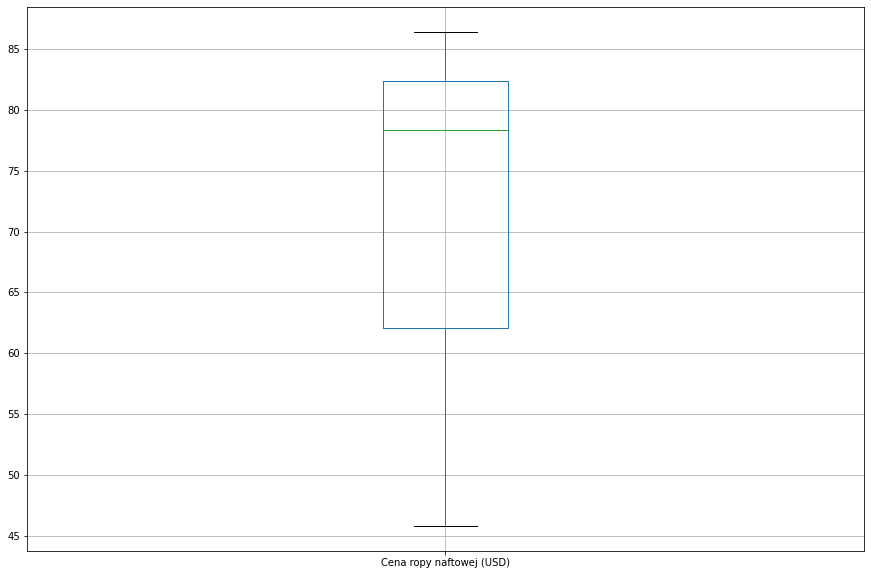

In [56]:
df2 = df[ df['Cena hurtowa PB95 (PLN)'] == 3.452]


df2.boxplot(['Cena ropy naftowej (USD)'])

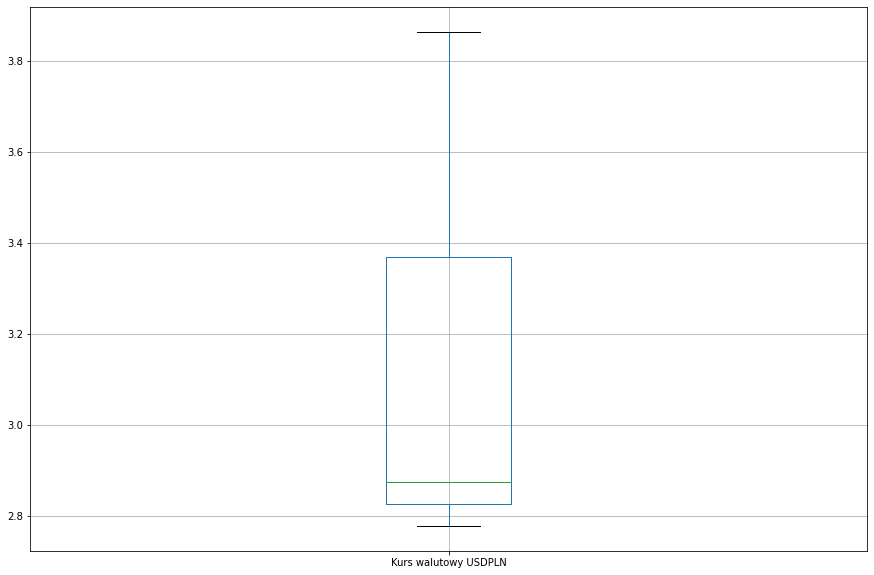

In [57]:
df2.boxplot(['Kurs walutowy USDPLN'])

In [ ]:
df = df.fillna(method='ffill')

In [ ]:
daty = list(df.index.values)
x = np.arange(0, len(daty), 1)

ropa = df['Cena ropy naftowej (USD)']
benzyna = df['Cena hurtowa PB95 (PLN)']
kurs = df['Kurs walutowy USDPLN']

# Cena ropy naftowej – Cena detaliczna PB95 - WK-1
corr1 = ropa.corr(benzyna)
print(f"Cena ropy naftowej – Cena detaliczna PB95 - WK-1 : {corr1}")
# Cena ropy naftowej–Kurs  walutowy - WK-2
corr2 = ropa.corr(kurs) 
print(f"Cena ropy naftowej – Kurs  walutowy - WK-2 : {corr2}")
# Kurs walutowy – Cena detaliczna PB95 - WK-3
corr3 = kurs.corr(benzyna)
print(f"Kurs walutowy – Cena detaliczna PB95 - WK-3 : {corr3}")

<ipython-input-31-69a74413b6a9>:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


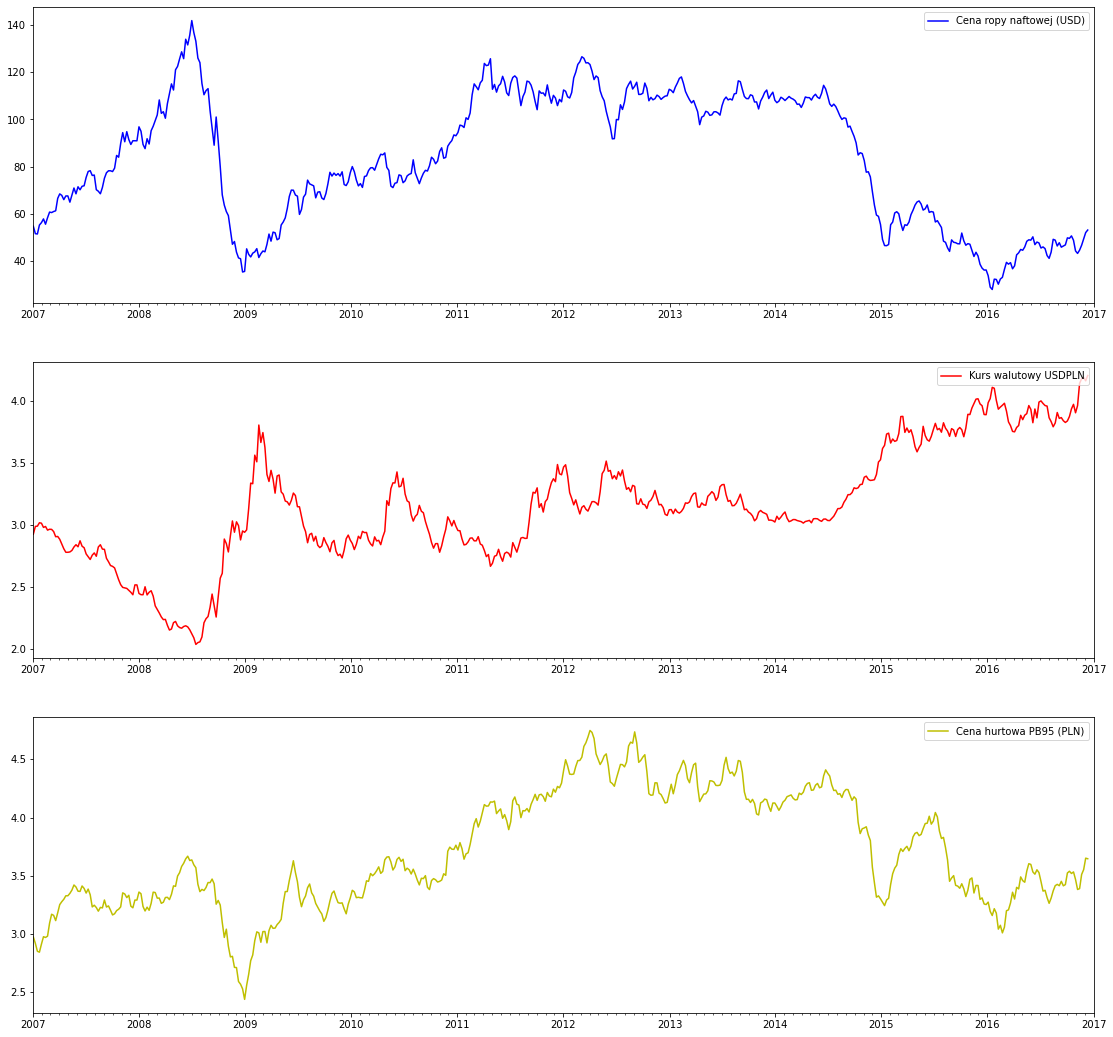

In [31]:
# detrend
import scipy.signal
import matplotlib.dates as mdates

daty = list(df.index.values)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

ropa = list(df['Cena ropy naftowej (USD)'].values)
benzyna = list(df['Cena hurtowa PB95 (PLN)'].values)
kurs = list(df['Kurs walutowy USDPLN'].values)

ropa_detrend = scipy.signal.detrend(ropa)
benzyna_detrend = scipy.signal.detrend(benzyna)
kurs_detrend = scipy.signal.detrend(kurs)


fig, ax = plt.subplots(3)

fig.set_size_inches(19,18.5 )

# format the ticks
datemin = datetime.date(df.index.min().year, 1, 1)
datemax = datetime.date(df.index.max().year + 1, 1, 1)

for i in range(0,3):
    ax[i].xaxis.set_major_locator(years)
    ax[i].xaxis.set_major_formatter(yearsFmt)
    ax[i].xaxis.set_minor_locator(months)
    ax[i].set_xlim(datemin, datemax)

l1, = ax[0].plot(daty, ropa, 'b', label='Cena ropy naftowej (USD)')
ax[0].legend(loc='upper right')

l2, = ax[1].plot(daty, kurs, 'r', label="Kurs walutowy USDPLN")
ax[1].legend(loc='upper right')

l3, = ax[2].plot(daty, benzyna, 'y', label='Cena hurtowa PB95 (PLN)')
ax[2].legend(loc='upper right')

fig.show()

fig.savefig("./ceny_i_kursy.png")

<ipython-input-51-9ad8f9e6f4c1>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


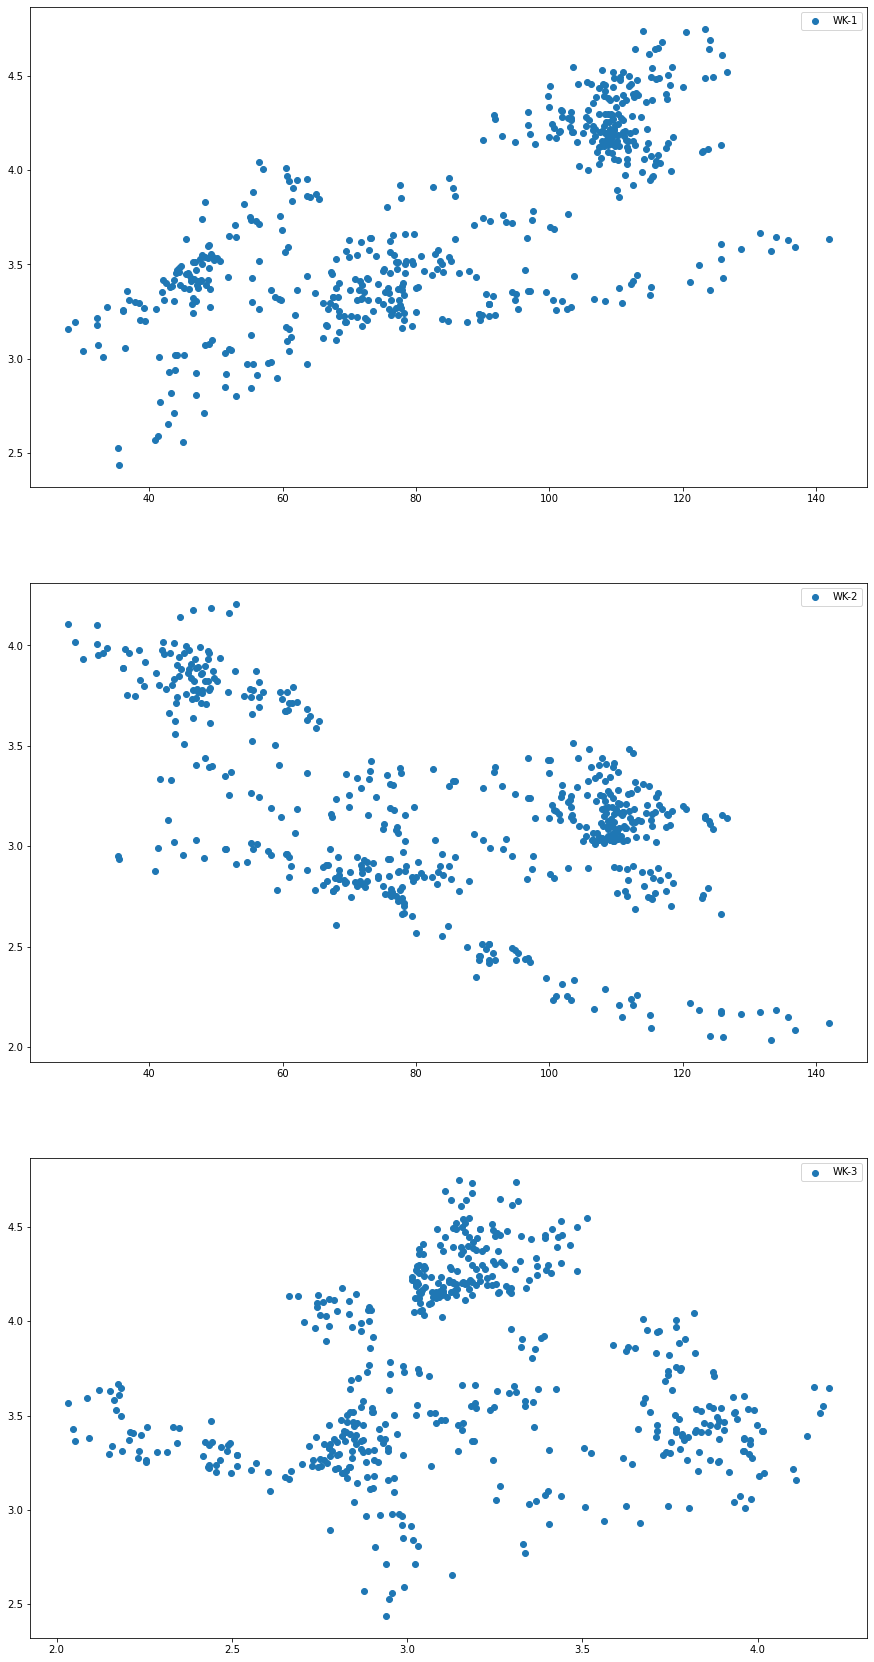

In [51]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(3)

fig.set_size_inches(15,30)


sc1 = ax[0].scatter(x=ropa, y=benzyna, label='WK-1')
ax[0].legend(loc='upper right')

sc2 = ax[1].scatter(x=ropa, y=kurs, label="WK-2")
ax[1].legend(loc='upper right')

sc3 = ax[2].scatter(x=kurs, y=benzyna, label='WK-3')
ax[2].legend(loc='upper right')

fig.show()

fig.savefig("./wk-1-2-3.png")



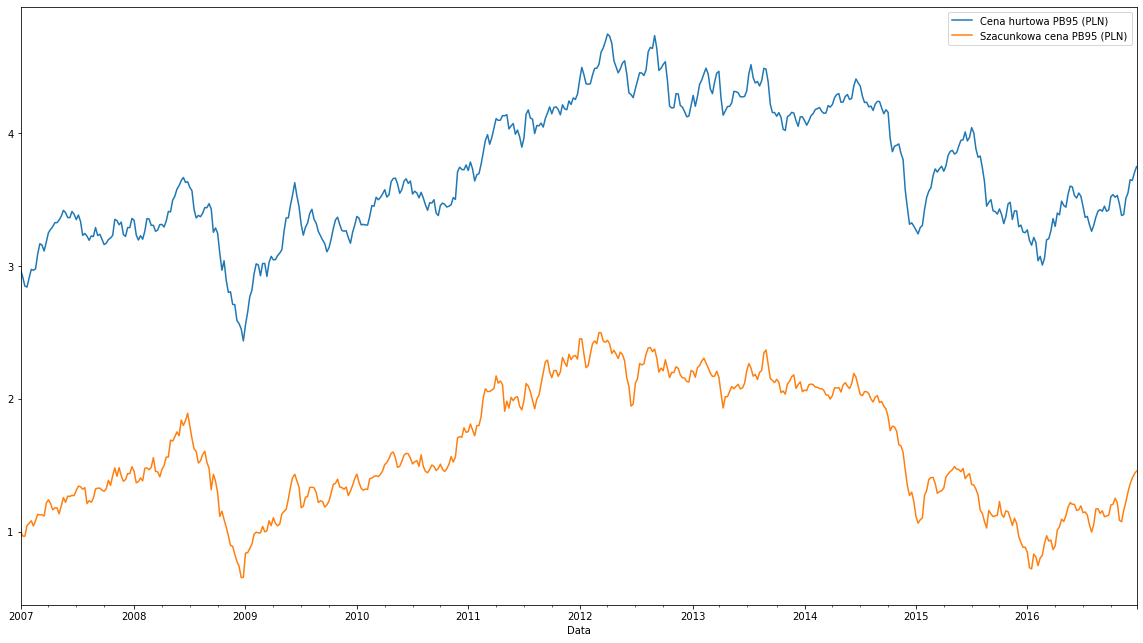

In [ ]:
# przyblizone wartosci - regresja liniowa

ropa = list(df['Cena ropy naftowej (USD)'].values)
benzyna = list(df['Cena hurtowa PB95 (PLN)'].values)
kurs = list(df['Kurs walutowy USDPLN'].values)

df['Szacunkowa cena PB95 (PLN)'] = df['Cena ropy naftowej (USD)'] * df['Kurs walutowy USDPLN'] * (1/158.99)
oszacowana_cena_benzyny = list(df['Szacunkowa cena PB95 (PLN)'].values)

df.plot(y=['Cena hurtowa PB95 (PLN)', 'Szacunkowa cena PB95 (PLN)']).save("")

In [ ]:
display(df)

In [ ]:
# zmienność korelacji obliczając ją dla kolejnych miesięcy

data = df.index
df.reset_index(drop=True, inplace=True)

start = 0
end = 7

df['WK-1'] = 0
df['WK-2'] = 0
df['WK-3'] = 0

while( end <= len(df) ):
    subset = df.iloc[start:end]
    
    df.loc[df.index.isin(range(start,end+1)), 'WK-1'] = subset['Cena ropy naftowej (USD)'].corr(subset['Cena hurtowa PB95 (PLN)'])
    df.loc[df.index.isin(range(start,end+1)), 'WK-2'] = subset['Cena ropy naftowej (USD)'].corr(subset['Kurs walutowy USDPLN']) 
    df.loc[df.index.isin(range(start,end+1)), 'WK-3'] = subset['Kurs walutowy USDPLN'].corr(subset['Cena hurtowa PB95 (PLN)'])
    

    start += 8
    end += 8

df['Data'] = data

df.drop(df.tail(2).index,inplace=True)
df.set_index('Data',inplace=True)
display(df)

In [ ]:
grouped = df.groupby(['WK-1']).first()
display(grouped)

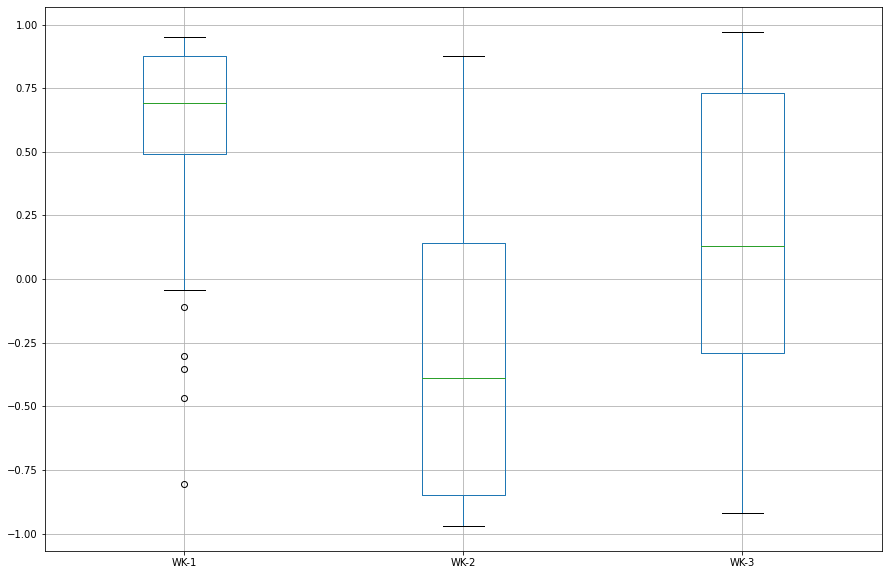

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)

grouped['WK-1'] = grouped.index
wk1 = grouped['WK-1']
wk2 = grouped['WK-2']
wk3 = grouped['WK-3']

#plt.hist(wk1)
#plt.hist(wk2)
#plt.hist(wk3)

grouped.boxplot(['WK-1','WK-2','WK-3'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B8AAC36DF0>]],
      dtype=object)

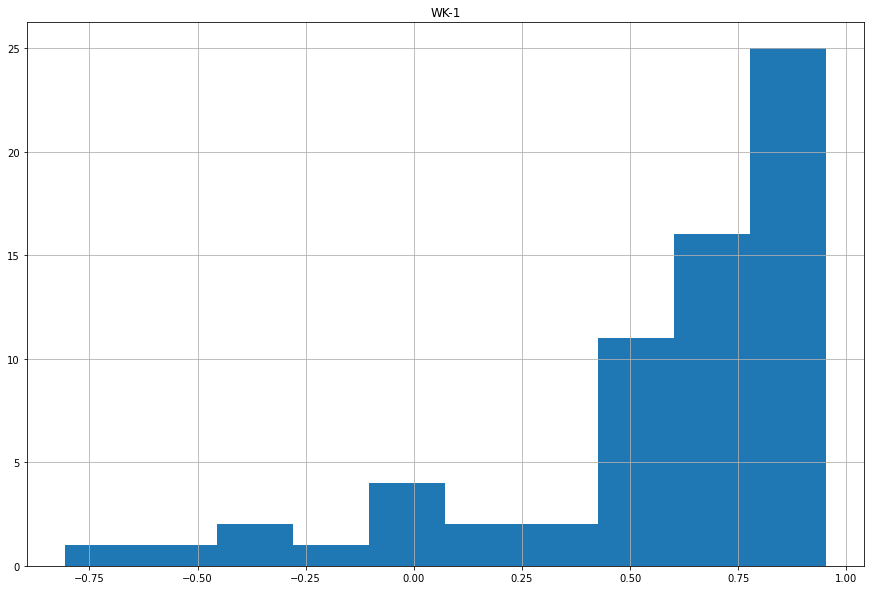

In [ ]:
grouped.hist(['WK-1'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B8AAC87CD0>]],
      dtype=object)

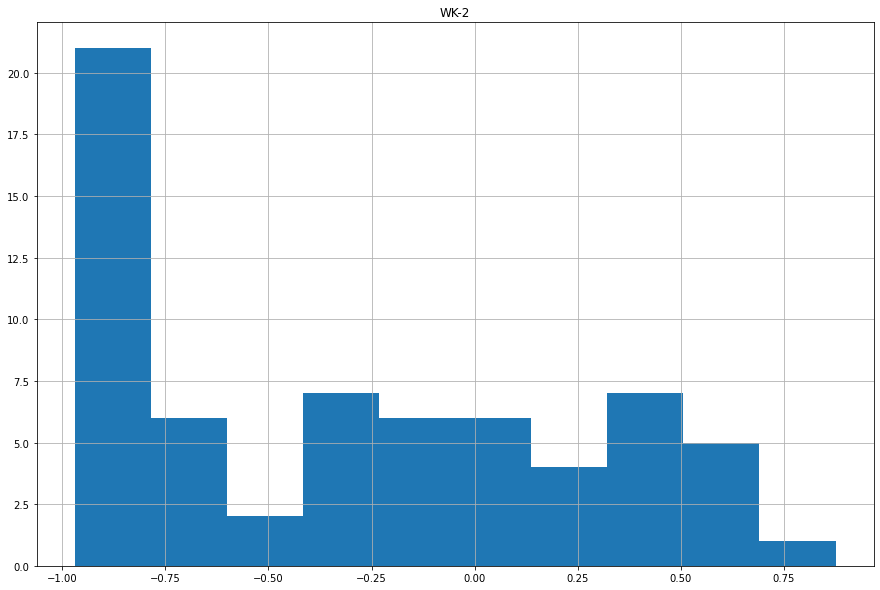

In [ ]:
grouped.hist(['WK-2'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B8AAF02520>]],
      dtype=object)

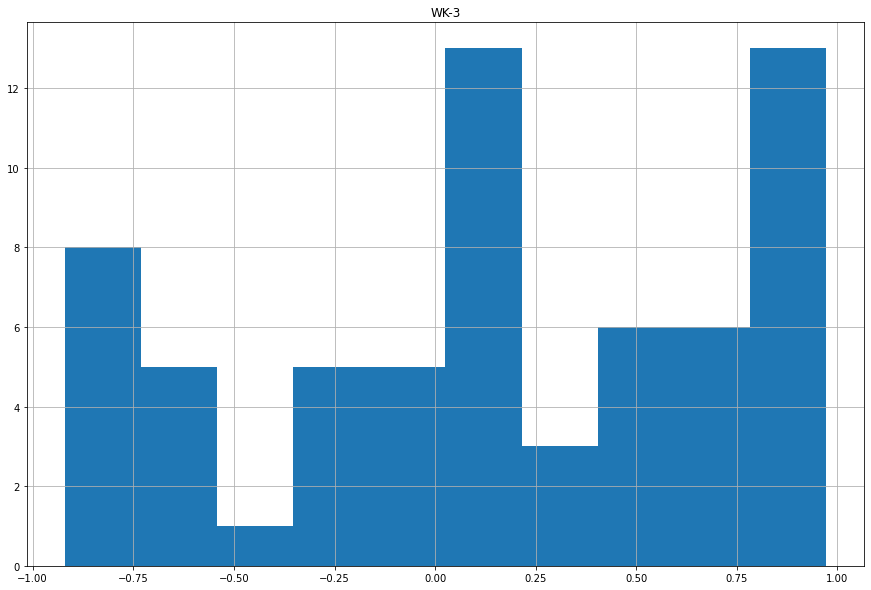

In [ ]:
grouped.hist(['WK-3'])

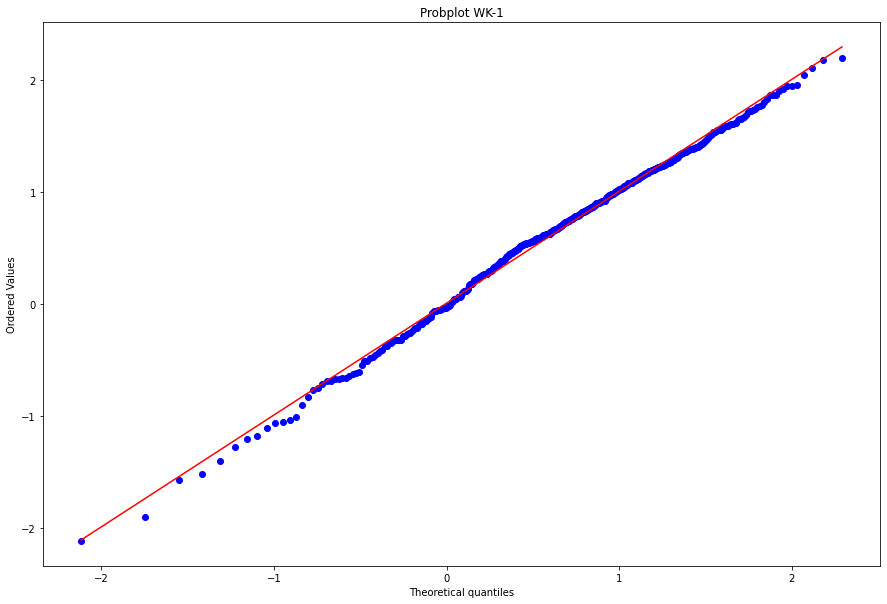

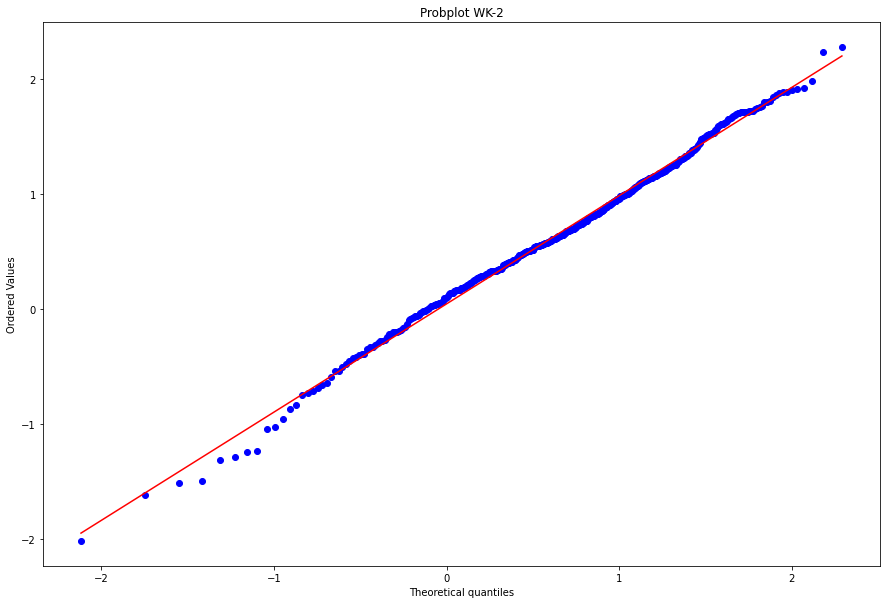

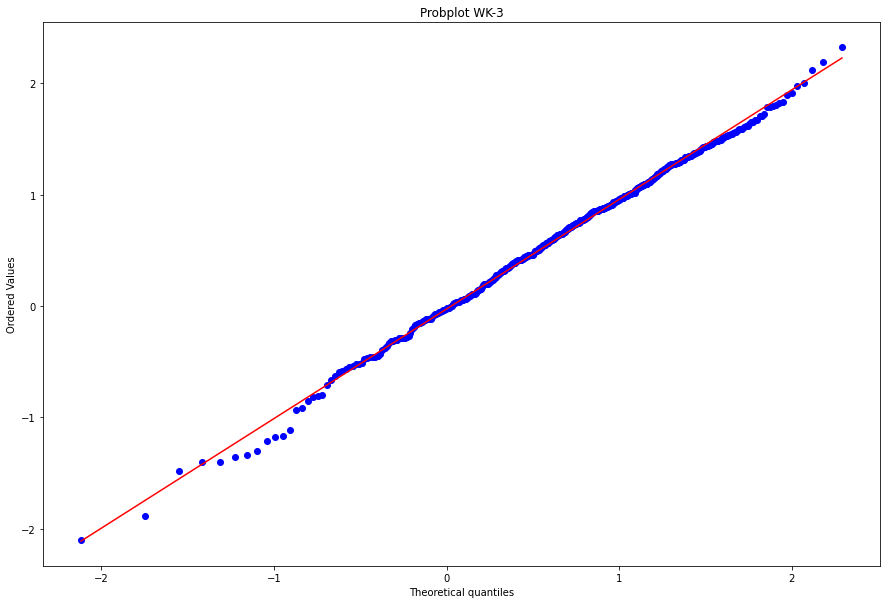

In [ ]:
import scipy.stats as stats

for wk in ['WK-1', 'WK-2', 'WK-3']:
    wk1 = list(grouped[wk].values)
    res = stats.probplot(wk1, dist="norm")

    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = stats.loggamma.rvs(c=2.5, size=500)
    res = stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax)

    ax.set_title(f"Probplot {wk}")